In [1]:
import requests
import numpy as np
import pandas as pd
import requests
import json
import time
from datetime import datetime
from datetime import timedelta
from collections import Counter


In [2]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

###Azuki traits

In [ ]:
#The first script
url = "https://api.opensea.io/api/v2/chain/ethereum/contract/0xED5AF388653567Af2F388E6224dC7C4b3241C544/nfts/9999"
headers = {
    "accept": "application/json",
    "x-api-key": api
}
r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries



In [ ]:
#Original function, to make 
df_all= pd.Series([])
for i in range(0,100):
    print(i)
    url = 'https://api.opensea.io/api/v2/chain/ethereum/contract/0xED5AF388653567Af2F388E6224dC7C4b3241C544/nfts/'+f'{i}'
    headers = {
    "accept": "application/json",
    "x-api-key": api
    }
    r = requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_all = pd.concat([df_all, df])
    

In [ ]:
df_100 = df_all

In [ ]:
#Make a function to get the trait according to token id
def get_traits(id1, id2):
    df_all= pd.Series([])
    for i in range(id1,id2):
        print(i)
        url = 'https://api.opensea.io/api/v2/chain/ethereum/contract/0xED5AF388653567Af2F388E6224dC7C4b3241C544/nfts/'+f'{i}'
        headers = {
        "accept": "application/json",
        "x-api-key": api
        }
        r = requests.get(url, headers=headers)
        json_data = json.loads(r.text)
        df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
        df_all = pd.concat([df_all, df])
        #time.sleep(2)
    return df_all
df_200 = get_traits(100,200) # get token between 100 and 199

In [ ]:
%store -r

In [ ]:
#Long format data need to be transformed
df_8000

In [ ]:
#To transform the data from long to wide format
pd.pivot(df_all, columns='trait_type', index='nft.identifier', values= 'value')

In [ ]:
azuki_trait 

In [ ]:
df_all = pd.pivot(df_all, columns='trait_type', index='nft.identifier', values= 'value')
df_all.reset_index(inplace=True) 
df_all

In [ ]:
df_2780 = pd.pivot(df_2780, columns='trait_type', index='nft.identifier', values= 'value')

In [ ]:
pd.pivot(df_all, columns='trait_type', index='nft.identifier', values= 'value')

In [ ]:
json_data

In [ ]:
df[['nft.identifier','trait_type','value']]

###Azuki events

In [7]:
num = list(range(2220,2230))
contract = '0xed5af388653567af2f388e6224dc7c4b3241c544'
headers = {
    "accept": "*/*",
    "x-api-key": event_api
}

In [ ]:
print(f'tokens={contract}%3A{str(i)}')
'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])

In [ ]:
f'Time: {datetime.now().isoformat(timespec="seconds")}'

In [ ]:
url = "https://api.reservoir.tools/sales/v6?tokens=0xed5af388653567af2f388e6224dc7c4b3241c544%3A394"

headers = {
    "accept": "*/*",
    "x-api-key": "6270fbfb-d539-5f94-808f-af868ffb1f95"
}

r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df_loop = pd.json_normalize(json_data, record_path=['sales'])


In [ ]:
df_loop

In [2]:
#Function need
def get_sales(num):
    print(num, f'Time: {datetime.now().isoformat(timespec="seconds")}')
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])+ '&limit=1000'
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales']) # this parameter adjust to new queries
    return df_loop

In [ ]:
len(df_loop)

In [ ]:
num =list(range(2220,2225))
df = get_sales(num)

In [83]:
#url = "https://api.reservoir.tools/sales/v6?tokens=0xed5af388653567af2f388e6224dc7c4b3241c544%3A4778&tokens=0xed5af388653567af2f388e6224dc7c4b3241c544%3A4779"
#Script Loop
#df = pd.Series([])

""" for i in list(range(0, 10)):
    num= list(range(i*10,i*10+10))
    print(num)
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales']) # this parameter adjust to new queries
    df=pd.concat([df，df_loop])
     """
#Formal Loop
for i in list(range(608, 1000)):
    num= list(range(i*10,i*10+10))
    df_loop = get_sales(num)
    if len(df_loop) ==0: #Some tokens do not have trading yet
        continue
    else:
        df=pd.concat([df,df_loop])
        time.sleep(0.5)

    

[6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089] Time: 2023-11-09T19:49:07
[6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099] Time: 2023-11-09T19:49:09
[6100, 6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109] Time: 2023-11-09T19:49:12
[6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119] Time: 2023-11-09T19:49:14
[6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129] Time: 2023-11-09T19:49:17
[6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139] Time: 2023-11-09T19:49:19
[6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149] Time: 2023-11-09T19:49:22
[6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159] Time: 2023-11-09T19:49:24
[6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169] Time: 2023-11-09T19:49:27
[6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179] Time: 2023-11-09T19:49:29
[6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189] Time: 2023-11-09T19:49:31
[6190, 6191, 6192, 6193, 6194, 6195, 6196, 

#Adjust the dataframe of Azuki_events

In [110]:
print(df[~df['token.tokenId'].isin(minted)]['token.tokenId'].unique())

[ 49  44  52  58  53  88  98  97 100 117 114 158 167 172 199 191 190 193
 194 197 198 192 195 196]


In [119]:
df.drop(columns= [0, 'id','saleId','orderId','logIndex', 'batchIndex','paidFullRoyalty',
                  'feeBreakdown','feeBreakdown','isDeleted','token.name','token.image',
                  'token.collection.id','token.collection.name','price.currency.contract','price.currency.name','price.currency.decimals', 'price.amount.raw',
                  'price.netAmount.raw'], inplace=True)

In [120]:
df.drop_duplicates(inplace=True)
df.index = range(len(df))

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83877 entries, 0 to 83876
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   orderSource              74067 non-null  object 
 1   orderSide                83877 non-null  object 
 2   orderKind                83877 non-null  object 
 3   from                     83877 non-null  object 
 4   to                       83877 non-null  object 
 5   amount                   83877 non-null  object 
 6   fillSource               74071 non-null  object 
 7   block                    83877 non-null  float64
 8   txHash                   83877 non-null  object 
 9   timestamp                83877 non-null  float64
 10  washTradingScore         83877 non-null  float64
 11  createdAt                83877 non-null  object 
 12  updatedAt                83877 non-null  object 
 13  token.contract           83877 non-null  object 
 14  token.tokenId         

In [122]:
df.columns

Index(['orderSource', 'orderSide', 'orderKind', 'from', 'to', 'amount',
       'fillSource', 'block', 'txHash', 'timestamp', 'washTradingScore',
       'createdAt', 'updatedAt', 'token.contract', 'token.tokenId',
       'price.currency.symbol', 'price.amount.decimal', 'price.amount.usd',
       'price.amount.native', 'royaltyFeeBps', 'price.netAmount.decimal',
       'price.netAmount.usd', 'price.netAmount.native', 'marketplaceFeeBps'],
      dtype='object')

In [ ]:
azuki_event['orderSource'].value_counts()

In [ ]:
pd.to_datetime(df['timestamp'], unit='s')

In [124]:
df['timestamp']= pd.to_datetime(df['timestamp'], unit='s')

In [125]:
df['createdAt']
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['updatedAt'] = pd.to_datetime(df['updatedAt'])

In [126]:
azuki_event.index = range(len(azuki_event))

In [127]:
azuki_event = df
azuki_event.sort_values('timestamp', ascending=True, inplace=True)

Stored 'azuki_event' (DataFrame)


#Analysis

In [8]:
#Import the trait of Azuki directly
%store -r azuki_trait azuki_event

In [9]:
azuki_trait['nft.identifier'] = pd.to_numeric(azuki_trait['nft.identifier'])

In [10]:
azuki_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83877 entries, 0 to 83876
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   orderSource              74067 non-null  object             
 1   orderSide                83877 non-null  object             
 2   orderKind                83877 non-null  object             
 3   from                     83877 non-null  object             
 4   to                       83877 non-null  object             
 5   amount                   83877 non-null  object             
 6   fillSource               74071 non-null  object             
 7   block                    83877 non-null  float64            
 8   txHash                   83877 non-null  object             
 9   timestamp                83877 non-null  datetime64[ns]     
 10  washTradingScore         83877 non-null  float64            
 11  createdAt                838

In [11]:
azuki_event.loc[52564]['txHash']

'0xe933f192547f1e15d92f88f4ab22a599938f399dec3fc2968722e3989cb9c44d'

In [12]:
a = azuki_event[azuki_event['txHash'] == '0xd7f8ee27c4ceb3c0079d6620a8a0509554e9bba36a9314935dd12b7df57e6f71']

In [13]:
a = pd.DataFrame(azuki_event['txHash'].value_counts())
a.reset_index(inplace=True)

print(a)

                                                  txHash  count
0      0x8d7bd524611f1c96e0fa9d2a55536eac3dcbcc182450...     60
1      0xcd273043757eddc038f6da3e6454c4605896c78901dd...     60
2      0x00b5a82122ef80a0598bb153e9cbf3cbc243afaeda1e...     52
3      0xb0baa10b586a98381d4df520580d597e3f6d894960ed...     51
4      0x9110944a0dd8ae22cbb30eb5aad6818ae8c44b05524d...     50
...                                                  ...    ...
67580  0x2213b65dd0e955fa6914f2a7fbd4747968ee5b5fc8ef...      1
67581  0xe6cd991b9b3009ac7bb2c1e7ae4067db68e44dab6395...      1
67582  0x3d3bbc607dfff78dd652afba03b1366de4d0ed1e75ed...      1
67583  0xc4dc4732abfc277a82de53fa43740756e672cc1151d2...      1
67584  0x5f09079d67fccbe6a4b2eddeec8f7c3663aa7d1a9ba8...      1

[67585 rows x 2 columns]


In [14]:
fig = go.Figure()

fig.add_trace(go.Bar(x=a[:10]["count"], y=a[:10]["txHash"], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "Ethereum Hash with the most Azuki tokens transfered")
fig.update_yaxes(title_text="txHash")
fig.update_xaxes(title_text="Count")
fig.show()

In [15]:
azuki_event.describe()
#The time range from 2022-01-12 (mint date) to 2023-11-05 04:53:11
#In dollar terms the highest sold was 1,430,878 usd

,block,timestamp,washTradingScore,token.tokenId,price.amount.decimal,price.amount.usd,price.amount.native,royaltyFeeBps,price.netAmount.decimal,price.netAmount.usd,price.netAmount.native,marketplaceFeeBps
count,8.387700e+04,83877,83877.000000,83877.000000,83877.000000,8.387700e+04,83877.000000,23927.000000,31873.000000,31873.000000,31873.000000,11516.000000
mean,1.577277e+07,2022-10-06 03:50:39.736220672,0.097106,5074.317465,9.923457,2.001588e+04,9.601748,126.022945,10.664657,19773.963194,10.664660,530.510594
min,1.399220e+07,2022-01-12 18:00:33,0.000000,44.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000300,0.000000,11.000000
25%,1.405590e+07,2022-01-22 14:16:19,0.000000,2628.000000,3.864980,8.932523e+03,3.864980,50.000000,6.069500,11070.095200,6.069500,250.000000
50%,1.593475e+07,2022-11-09 20:08:11,0.000000,5103.000000,9.000000,1.531740e+04,9.000000,50.000000,12.568500,20664.912260,12.568500,750.000000
75%,1.744787e+07,2023-06-10 06:02:11,0.000000,7437.000000,14.290000,2.557507e+04,14.290000,50.000000,14.566800,25230.129800,14.566800,750.000000
max,1.853384e+07,2023-11-09 10:37:35,1.000000,9999.000000,27000.000000,1.430878e+06,420.700000,6392.000000,328.041550,629912.939430,328.041550,1485.000000
std,1.581414e+06,NaN,0.296104,2794.701890,93.602676,2.129287e+04,8.737497,184.492074,7.189057,14220.008504,7.189058,277.625515


In [16]:
azuki_event['orderSource'].value_counts()

orderSource
blur.io           38503
opensea.io        29554
looksrare.org      3167
x2y2.io            2265
sudoswap.xyz        458
nftx.io              53
gem.xyz              44
benddao.xyz          10
nfttrader.io          3
element.market        2
alienswap.xyz         2
magically.gg          2
collection.xyz        2
rarible.com           1
okx.com               1
Name: count, dtype: int64

In [17]:
#Create b, merger small order sources to 'Others'
a = azuki_event['orderSource'].value_counts()
c = pd.Series(sum(a[5:]), index= ['others']) #Create a new
b = a[:5].add(c, fill_value=0)
b

blur.io          38503.0
looksrare.org     3167.0
opensea.io       29554.0
others             120.0
sudoswap.xyz       458.0
x2y2.io           2265.0
dtype: float64

In [18]:
#Make a pie chart according to source
a = azuki_event['orderSource'].value_counts()
c = pd.Series(sum(a[5:]), index= ['others']) #Create a new
b = a[:5].add(c, fill_value=0)

labels= b.index
values= b
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text = "Marketplace share of Azuki trades in NFT marketplaces", width =500, height = 400)
fig.show()

In [19]:
azuki_event['price.currency.symbol'].value_counts()
#The trade settled by USDC has a small monetary value, we can ignore it

price.currency.symbol
ETH     81488
WETH     2388
USDC        1
Name: count, dtype: int64

In [20]:
azuki_event.columns

Index(['orderSource', 'orderSide', 'orderKind', 'from', 'to', 'amount',
       'fillSource', 'block', 'txHash', 'timestamp', 'washTradingScore',
       'createdAt', 'updatedAt', 'token.contract', 'token.tokenId',
       'price.currency.symbol', 'price.amount.decimal', 'price.amount.usd',
       'price.amount.native', 'royaltyFeeBps', 'price.netAmount.decimal',
       'price.netAmount.usd', 'price.netAmount.native', 'marketplaceFeeBps'],
      dtype='object')

In [21]:
azuki_event.sort_values('price.amount.decimal', ascending=False).iloc[1:20]

,orderSource,orderSide,orderKind,from,to,amount,fillSource,block,txHash,timestamp,...,token.tokenId,price.currency.symbol,price.amount.decimal,price.amount.usd,price.amount.native,royaltyFeeBps,price.netAmount.decimal,price.netAmount.usd,price.netAmount.native,marketplaceFeeBps
31393,opensea.io,ask,wyvern-v2.3,0xebfb3b263f11bb1a9d6b14cade9a5e6c8ea4e07c,0x6db81d551cc1d1dca0ebff2c4eb215ba112e8664,1,opensea.io,14485369.0,0xf7f238e43636bea0d4a6bc024a038a0ff5245ca4e8a4...,2022-03-30 04:16:27,...,9605,ETH,420.7000,1.430878e+06,420.7000,NaN,NaN,NaN,NaN,NaN
57080,looksrare.org,ask,looks-rare-v2,0x54be3a794282c030b15e43ae2bb182e14c409c5e,0x66666f58de1bcd762a5e5c5aff9cc3c906d66666,1,looksrare.org,17035886.0,0x58e0080803c6c3d8deda2bfb5e8d1b5bedc76a6360c5...,2023-04-13 02:27:23,...,3628,ETH,329.6900,6.330783e+05,329.6900,50.0,328.04155,629912.93943,328.04155,NaN
46803,blur.io,ask,blur,0x154f4a87f0fde6b52469af74e66f3c6a788916b2,0x572d6f0628ef555061932f85687c9f8f85505ed1,1,blur.io,16336035.0,0xb370745b1260c57793929d92627b2783e2816979e348...,2023-01-04 21:12:35,...,7257,ETH,288.6900,3.506893e+05,288.6900,50.0,287.24655,348935.89742,287.24655,NaN
32449,looksrare.org,ask,looks-rare,0x54be3a794282c030b15e43ae2bb182e14c409c5e,0x6e404d8ebf475e196e0581df3b5c1d43478ad40c,1,looksrare.org,14534106.0,0x609f8b418179b18ed6347fc96e602e2bff93b32317cf...,2022-04-06 19:16:13,...,3602,ETH,275.0000,9.413167e+05,275.0000,NaN,NaN,NaN,NaN,NaN
46740,blur.io,ask,blur,0x50664ede715e131f584d3e7eaabd7818bb20a068,0x2448247e25220ac04a9048ac563c5edd5b5644ce,1,blur.io,16331160.0,0xb7f17629171710cef18ab7f927025ec57ebeee2fce55...,2023-01-04 04:53:59,...,3153,ETH,249.0000,3.023804e+05,249.0000,50.0,247.75500,300868.45577,247.75500,NaN
57032,x2y2.io,ask,x2y2,0xbce3cd2c0752feeede1e27debc361bece42a037b,0xa9c859686f6a3cd942d1007a0d0c0710af4d694e,1,x2y2.io,17031950.0,0x0733c92207e3d2ef797f9b2ca93ab1962fe2ddc09f9b...,2023-04-12 12:32:59,...,5172,ETH,245.0000,4.637700e+05,245.0000,NaN,NaN,NaN,NaN,NaN
68646,x2y2.io,ask,x2y2,0x8bfad4b4575d672362a6e4785a7b019ebbaa1be6,0x66666f58de1bcd762a5e5c5aff9cc3c906d66666,1,x2y2.io,17591205.0,0x47e70378d740c9c4696c92d9c1215740622cc49526bf...,2023-06-30 09:28:59,...,4666,ETH,235.0000,4.355596e+05,235.0000,NaN,NaN,NaN,NaN,NaN
52341,x2y2.io,ask,x2y2,0x36c1625e5ee6fbfa9fadd4f75790275e5eab7107,0x80ac8b6f4cacea6129f5cf1365904f056b4e29ea,1,x2y2.io,16713026.0,0x9cdc8aa535b66b5a86690c833b92f86877268bf374b6...,2023-02-26 14:32:59,...,2904,ETH,220.0000,3.634070e+05,220.0000,NaN,NaN,NaN,NaN,NaN
56288,x2y2.io,ask,x2y2,0xb2e714bf6b0cdde7f27316132fb612315f3faf91,0x48300c17703308209d83eab179afeb993a94ee45,1,x2y2.io,16979943.0,0x553844a261f276e5d3168111d170428e8796959d37fd...,2023-04-05 03:28:35,...,3194,ETH,218.0000,3.946816e+05,218.0000,NaN,NaN,NaN,NaN,NaN
32591,looksrare.org,bid,looks-rare,0x7304e20698f3f20405990916e784b83a4c93303f,0x9d567987d4d7895d0940765b2b6c97a0fa4b59be,1,looksrare.org,14566978.0,0xa50d07745b0c20bb46337475224f2bb42e4fdfa47ac9...,2022-04-11 22:15:05,...,9759,WETH,210.0000,6.760235e+05,210.0000,500.0,195.30000,628701.86070,195.30000,200.0


In [22]:
azuki_event['orderSide'].value_counts()

orderSide
ask    56567
bid    27310
Name: count, dtype: int64

In [23]:
#Ptrade = Ptrade.merge(Metadata_2[['token_id', 'last_metadata_update']], how ='left', left_on='token.token_id', right_on='token_id') #Merge the columns to get last metadata update
azuki_event.merge(azuki_trait, how='left', left_on='token.tokenId', right_on='nft.identifier' )

,orderSource,orderSide,orderKind,from,to,amount,fillSource,block,txHash,timestamp,...,Eyes,Face,Hair,Headgear,Mouth,Neck,Offhand,Special,Type,azuki_gold
0,None,ask,mint,0x0000000000000000000000000000000000000000,0x933899194a99b567103e42785e787df8c248eb08,1,None,13992202.0,0x270ee66104e3421bda6257948002fa9a8dd4ba1f065a...,2022-01-12 18:00:33,...,Glowing,NaN,Blue Short Spiky,Cat Headband,Face Mask,NaN,Golden Katana,NaN,Human,Gold
1,None,ask,mint,0x0000000000000000000000000000000000000000,0x20cde55af449020cff643b988c278a6a5bef6764,1,None,13992202.0,0x5d8f80d04d266f90a9d9e29e23832b1173c62b5d90ef...,2022-01-12 18:00:33,...,Suspicious,NaN,Silver Swept Back,NaN,Stubble,NaN,Banner,NaN,Blue,Non-Gold
2,None,ask,mint,0x0000000000000000000000000000000000000000,0x55e1662caf187b3694f3f9e91fd51dd88bde9a07,1,None,13992202.0,0x2159bec32979bf08f7cf8657c0ebe892b19468f8f7b6...,2022-01-12 18:00:33,...,Pierced Eyebrow,Eye Scar,Violet Flowy,NaN,Lipstick,NaN,NaN,NaN,Human,Non-Gold
3,None,ask,mint,0x0000000000000000000000000000000000000000,0x55e1662caf187b3694f3f9e91fd51dd88bde9a07,1,None,13992202.0,0x2159bec32979bf08f7cf8657c0ebe892b19468f8f7b6...,2022-01-12 18:00:33,...,Ruby,NaN,Maroon Half Bun,NaN,Frown,NaN,NaN,NaN,Human,Non-Gold
4,None,ask,mint,0x0000000000000000000000000000000000000000,0x514cb6f693886d4294427ccfb6d4f454460dd3f2,1,None,13992202.0,0x66c3fe182f658dbebc76d4024970cc48c8fb354a23a0...,2022-01-12 18:00:33,...,Closed,Sleep Mask,Brown Blonde Flowy,NaN,Smile,Choker,Zanbato,NaN,Human,Non-Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83872,blur.io,ask,blur-v2,0x1f879248de517fc341530ae1d070b3160409cf9b,0xc3467d6b095fe9fddd0e2958030bddfb3865817d,1,okx.com,18533096.0,0xf8bdde9bb8d3e302b628aae0b2fda69a46111c308309...,2023-11-09 08:08:35,...,Bored,Round Blue Sunglasses,Blonde Short Spiky,Red Panda Baseball Cap,Grass,NaN,Banner,NaN,Human,Non-Gold
83873,blur.io,ask,blend,0x0097b9cfe64455eed479292671a1121f502bc954,0x4d61e5156866d83b8b9a48d5f86a53686bde6b9d,1,blur.io,18533299.0,0x06613f29c694efb1e9bb254a6e227b4ced980b74ad9e...,2023-11-09 08:49:35,...,White,NaN,Powder Blue Disheveled,NaN,Relaxed,NaN,Bean Juice,NaN,Human,Non-Gold
83874,blur.io,ask,blur-v2,0xca1ee6abeaa8d61c9d3e73c94d7bdb9fbc114138,0x8f6dec4ef0c39461e0be398623c3ce075a86c176,1,blur.io,18533382.0,0x36d6f03afb539f3923a57ba5d24d9418a8cf543f0a93...,2023-11-09 09:06:23,...,Tired,Kabuki Facepaint,Brown Messy,NaN,Chuckle,NaN,NaN,NaN,Human,Non-Gold
83875,blur.io,ask,blend,0x3fb65feeab83bf60b0d1ffbc4217d2d97a35c8d4,0x18929dbe1644fa75dd68ae5e4dbebf0b419f1dee,1,blur.io,18533589.0,0x5941bab606c8aaf8c840d59e05153fe2819736916b9a...,2023-11-09 09:47:47,...,Closed,Ji Eyeband,Brown Dreadlocks,NaN,Lipstick,Towel,NaN,NaN,Human,Non-Gold


In [24]:
a = azuki_event['from'].value_counts().reset_index()
b = azuki_event['to'].value_counts().reset_index()
c = a.merge(b, left_on='from', right_on='to', how='outer')


In [25]:
c = a.merge(b, left_on='from', right_on='to', how='outer')
c['Count of purchase and sell action'] = pd.to_numeric(c['count_x'])+pd.to_numeric(c['count_y'])

In [26]:
azuki_event['to'].value_counts()

to
0x77e3e957082ca648c1c5b0f3e6aec00ab1245186    1452
0x020ca66c30bec2c4fe3861a94e4db4a498a35872    1321
0xcbb0fe555f61d23427740984325b4583a4a34c82     971
0xa7078ddf23d29e9d6e54e34909cd2ac1b33a67c5     861
0x7df70b612040c682d1cb2e32017446e230fcd747     859
                                              ... 
0x35523f22fddc5dafafcf1e5aef21f43d5b5a8f9f       1
0xd918252c46bf5d399ce827151b422810388c79ec       1
0xc4cca7049fba013313f57e0139b954913d541ad2       1
0x9e4ac0070998542ce30a86e44ef13ed22ca42797       1
0xe45007b5b2d3efaea5ad0f22acae223dfa1338eb       1
Name: count, Length: 20496, dtype: int64

In [27]:
d = c.sort_values('Count of purchase and sell action', ascending=False).head(10)

In [28]:
d

,from,count_x,to,count_y,Count of purchase and sell action
1,0x77e3e957082ca648c1c5b0f3e6aec00ab1245186,1367.0,0x77e3e957082ca648c1c5b0f3e6aec00ab1245186,1452.0,2819.0
2,0x020ca66c30bec2c4fe3861a94e4db4a498a35872,1326.0,0x020ca66c30bec2c4fe3861a94e4db4a498a35872,1321.0,2647.0
3,0xcbb0fe555f61d23427740984325b4583a4a34c82,978.0,0xcbb0fe555f61d23427740984325b4583a4a34c82,971.0,1949.0
4,0x7df70b612040c682d1cb2e32017446e230fcd747,861.0,0x7df70b612040c682d1cb2e32017446e230fcd747,859.0,1720.0
5,0xa7078ddf23d29e9d6e54e34909cd2ac1b33a67c5,849.0,0xa7078ddf23d29e9d6e54e34909cd2ac1b33a67c5,861.0,1710.0
6,0x385ce35599ae5e6f0eaf0f69841fffa9f41acdd5,663.0,0x385ce35599ae5e6f0eaf0f69841fffa9f41acdd5,667.0,1330.0
7,0x5f1ee29361206f1a129e808736f11598356c6031,516.0,0x5f1ee29361206f1a129e808736f11598356c6031,523.0,1039.0
8,0x97c7d94d01bcbc41b80ef7cc8c5bebc3d11c6a20,441.0,0x97c7d94d01bcbc41b80ef7cc8c5bebc3d11c6a20,488.0,929.0
9,0xfa0e027fcb7ce300879f3729432cd505826eaabc,432.0,0xfa0e027fcb7ce300879f3729432cd505826eaabc,437.0,869.0
10,0x68663fb06b6e718e7026aa1c2ddbc4e97ccd6c5c,421.0,0x68663fb06b6e718e7026aa1c2ddbc4e97ccd6c5c,420.0,841.0


In [29]:
d[d.columns[-1]]

1     2819.0
2     2647.0
3     1949.0
4     1720.0
5     1710.0
6     1330.0
7     1039.0
8      929.0
9      869.0
10     841.0
Name: Count of purchase and sell action, dtype: float64

In [30]:
fig = go.Figure()

fig.add_trace(go.Bar(y=d["from"], x=d[d.columns[-1]], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade Azuki NFT")
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show()

###Detect arbitrary bots activities 

In [31]:
azuki_event[azuki_event['token.tokenId']==200].index

Index([   57, 24172, 25338, 25943, 33286, 35818, 57528, 58901, 58917, 58952,
       59307, 59516, 69448, 69546, 69563, 69751, 70317],
      dtype='int64')

In [32]:
azuki_event[azuki_event['token.tokenId']==200]

,orderSource,orderSide,orderKind,from,to,amount,fillSource,block,txHash,timestamp,...,token.tokenId,price.currency.symbol,price.amount.decimal,price.amount.usd,price.amount.native,royaltyFeeBps,price.netAmount.decimal,price.netAmount.usd,price.netAmount.native,marketplaceFeeBps
57,None,ask,mint,0x0000000000000000000000000000000000000000,0xdec08cb92a506b88411da9ba290f3694be223c26,1,None,13992202.0,0xe3034e18aa6fa00ac39ffb6904baf9570cc31c1716c5...,2022-01-12 18:00:33,...,200,ETH,1.0000,3246.41372,1.0000,NaN,NaN,NaN,NaN,NaN
24172,opensea.io,ask,wyvern-v2,0x548efce69bb82a16f3911a86a65384327c99c3ab,0x624b0ff878be99895e15be165b561b43d7223952,1,opensea.io,14088376.0,0xeaed6a7e9600aaa7431c3fe8fcba91d86f70d3284971...,2022-01-27 15:08:22,...,200,ETH,7.9400,19615.21747,7.9400,NaN,NaN,NaN,NaN,NaN
25338,opensea.io,ask,wyvern-v2,0x624b0ff878be99895e15be165b561b43d7223952,0x91ec3fb9ef2406947cf5dfb2460ad404e810698c,1,opensea.io,14111321.0,0xaeeca3480bb175054d928399f30caf1ced9ac0c715e6...,2022-01-31 03:51:41,...,200,ETH,9.2899,24248.33353,9.2899,NaN,8.59316,22429.70852,8.59316,750.0
25943,opensea.io,ask,wyvern-v2,0x91ec3fb9ef2406947cf5dfb2460ad404e810698c,0xb88194f9bcc5ec80cf80c163ca2b123917468793,1,genie.xyz,14118292.0,0x13aca44ce9c2c7a848b52b043c57141c64767ef99af8...,2022-02-01 05:32:51,...,200,ETH,13.3500,35901.09857,13.3500,NaN,12.34875,33208.51618,12.34875,750.0
33286,looksrare.org,ask,looks-rare,0xb88194f9bcc5ec80cf80c163ca2b123917468793,0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2,1,gem.xyz,14696037.0,0xd6b8a79b708953f43db4f17267e4b73e3def07231b14...,2022-05-02 03:48:01,...,200,ETH,28.0000,79310.36700,28.0000,NaN,NaN,NaN,NaN,NaN
35818,opensea.io,ask,wyvern-v2.3,0x7fa1b20661c6963848e22a51c04bfc2c384dfabc,0xdf248aa0afdb8d9371f511680322049f89b46381,1,opensea.io,14751669.0,0x779f509b255ed564f2495b0810c61bbd0332ec7311b8...,2022-05-11 00:24:49,...,200,ETH,7.3000,17117.02333,7.3000,NaN,NaN,NaN,NaN,NaN
57528,opensea.io,ask,seaport-v1.4,0xbebcbd4061ca1429078855828462d22a24ac87ea,0xc240163e581b09a1f67015e237ff895b8555df76,1,blur.io,17069068.0,0x2638fafabbcdbd7aebcfb257f6d76c2b4fce9d4bfb02...,2023-04-17 21:11:23,...,200,ETH,15.6890,33238.69640,15.6890,100.0,15.13988,32075.34203,15.13988,250.0
58901,blur.io,bid,blur,0xc240163e581b09a1f67015e237ff895b8555df76,0xea080de78b140031ce75f6cd7dd7e2cab854e240,1,blur.io,17168330.0,0xbfdc8a548ab5f71c075a5d1003a7270829ba7b7baad9...,2023-05-01 20:24:47,...,200,ETH,15.2500,28752.22701,15.2500,50.0,15.17375,28608.46587,15.17375,NaN
58917,blur.io,ask,blur,0xea080de78b140031ce75f6cd7dd7e2cab854e240,0xb284f19ffa703daadf6745d3c655f309d17370a5,1,blur.io,17168574.0,0x73862d400b52723c0075b15f31748e6f4853c776b8ff...,2023-05-01 21:13:47,...,200,ETH,15.4500,29129.30539,15.4500,50.0,15.37275,28983.65887,15.37275,NaN
58952,blur.io,ask,blend,0xb284f19ffa703daadf6745d3c655f309d17370a5,0x308292ad5be57ec7a1425bb9393c6e53b7547639,1,blur.io,17169237.0,0xc7f0f8de12e155c615e1c9d1734a97af909b96eb126d...,2023-05-01 23:28:11,...,200,ETH,15.5500,29317.84459,15.5500,NaN,NaN,NaN,NaN,NaN


In [33]:
pd.Timedelta('0 days 00:00:02') > pd.Timedelta('0 days 03:27:48')

False

In [34]:
a = pd.Series(range(len(azuki_event)), index=azuki_event.index)
b = pd.Series(range(len(azuki_event)), index=azuki_event.index)

In [35]:
a.loc[azuki_event[azuki_event['token.tokenId']==200].index] = azuki_event[azuki_event['token.tokenId']==200]['timestamp'].diff()

<ipython-input-35-79f0907ae551>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<TimedeltaArray>
[                NaT,  '14 days 21:07:49',   '3 days 12:43:19',
   '1 days 01:41:10',  '89 days 22:15:10',   '8 days 20:36:48',
 '341 days 20:46:34',  '13 days 23:13:24',   '0 days 00:49:00',
   '0 days 02:14:24',   '1 days 05:54:48',   '1 days 01:18:36',
  '58 days 10:01:36',   '0 days 00:59:00',   '0 days 00:17:24',
   '0 days 03:27:48',   '1 days 07:56:48']
Length: 17, dtype: timedelta64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [36]:
azuki_event[azuki_event['token.tokenId']==200]['price.amount.decimal'].diff()

57           NaN
24172     6.9400
25338     1.3499
25943     4.0601
33286    14.6500
35818   -20.7000
57528     8.3890
58901    -0.4390
58917     0.2000
58952     0.1000
59307     0.8000
59516    -0.9700
69448    -8.4000
69546     0.0200
69563    -0.6670
69751     0.0070
70317     0.6090
Name: price.amount.decimal, dtype: float64

In [37]:
azuki_event.columns

Index(['orderSource', 'orderSide', 'orderKind', 'from', 'to', 'amount',
       'fillSource', 'block', 'txHash', 'timestamp', 'washTradingScore',
       'createdAt', 'updatedAt', 'token.contract', 'token.tokenId',
       'price.currency.symbol', 'price.amount.decimal', 'price.amount.usd',
       'price.amount.native', 'royaltyFeeBps', 'price.netAmount.decimal',
       'price.netAmount.usd', 'price.netAmount.native', 'marketplaceFeeBps'],
      dtype='object')

In [38]:
#Replace the list value with time different, loop over token ID
for i in range(10000):
    a.loc[azuki_event[azuki_event['token.tokenId']==i].index] = azuki_event[azuki_event['token.tokenId']==i]['timestamp'].diff()
    #Profit
    b.loc[azuki_event[azuki_event['token.tokenId']==i].index] = azuki_event[azuki_event['token.tokenId']==i]['price.amount.decimal'].diff()

<ipython-input-38-f9d912205575>:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[     nan  1.19752 -1.3188  -0.21     0.       0.57    -0.04     0.
 -0.01    -0.48     0.25    -0.54     0.31     0.      -0.19     0.06
  0.9      0.16     0.11     1.08     0.45     0.05    -0.97    -6.81
 -0.84    -1.68    -0.05     0.11    -0.02     0.01    -0.37   ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [39]:
azuki_event['time_diff']= a
azuki_event['Arbitrage profit'] = b

In [40]:
bots = azuki_event[azuki_event['time_diff']< pd.Timedelta('0 days 00:00:02')][['txHash','timestamp','token.tokenId','Arbitrage profit','from','to','orderSource']]

In [41]:
bots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 17346 to 78646
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   txHash            111 non-null    object        
 1   timestamp         111 non-null    datetime64[ns]
 2   token.tokenId     111 non-null    int64         
 3   Arbitrage profit  111 non-null    float64       
 4   from              111 non-null    object        
 5   to                111 non-null    object        
 6   orderSource       111 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 6.9+ KB


In [42]:
bots.head()

,txHash,timestamp,token.tokenId,Arbitrage profit,from,to,orderSource
17346,0x83e8dbd7def876c4906d5f3c45f4ba299f4a1f15c381...,2022-01-20 20:25:57,7756,-0.3219,0x84649ab570f6a4e179a65fcc2f14aafd363680db,0x76a45fbe7cd2ebf32459401eea870d17e50c2107,opensea.io
17427,0x1b468a301c9a8c6e51cb3a0f4d496fa340e20bb15dde...,2022-01-20 20:30:29,7060,-0.3219,0x4dbe965abcb9ebc4c6e9d95aeb631e5b58e70d5b,0x76a45fbe7cd2ebf32459401eea870d17e50c2107,opensea.io
17459,0x06e1606c94a4a5f85c59bc249582a462d788055911f0...,2022-01-20 20:32:19,5083,-0.3219,0x36b70581a4d5ebfdb5c39361c90242fba3c7dacc,0x76a45fbe7cd2ebf32459401eea870d17e50c2107,opensea.io
21635,0xfd96ddc09cc460963c3e43429dfad781e9b08cd5c4fd...,2022-01-24 12:14:32,4118,0.5000,0xe4e87ef976eab568fda866d23141d37950baf4d9,0x3773e380e06c6ec156116f77021862c45c6022bb,opensea.io
21647,0x8b49f083e3466db94ad6234696308f6c9c2690b23d68...,2022-01-24 13:03:36,6180,-0.4000,0x0fa0d3b54f19bddaa358f55451c82436d95390d9,0x305d6b86c9758f81a18d22105655313cc58e1a9f,opensea.io


In [42]:
bots.describe() #The negative is due to same block issue, which means, it happened in the same time so block chain or API may record the arbitrage actions in reverse order.

,timestamp,token.tokenId,Arbitrage profit
count,111,111.000000,111.000000
mean,2022-09-28 13:30:41.522522368,5557.972973,-0.316375
min,2022-01-20 20:25:57,314.000000,-8.900000
25%,2022-05-10 08:58:22.500000,2846.500000,-0.655015
50%,2022-10-17 19:01:23,6084.000000,0.000000
75%,2023-02-25 08:05:47,7991.000000,0.395000
max,2023-08-12 17:07:23,9932.000000,8.610000
std,NaN,2882.224392,1.913927


In [43]:
#For example, index 28602 are actually happened after 28603, thus the profit is not negative actually.
#It explains the negative profit
azuki_event[azuki_event['token.tokenId']==746]

,orderSource,orderSide,orderKind,from,to,amount,fillSource,block,txHash,timestamp,...,price.amount.decimal,price.amount.usd,price.amount.native,royaltyFeeBps,price.netAmount.decimal,price.netAmount.usd,price.netAmount.native,marketplaceFeeBps,time_diff,Arbitrage profit
191,None,ask,mint,0x0000000000000000000000000000000000000000,0xfe14c5409e7e95cf022f81027c120f2c3c0acf8e,1,None,13992203.0,0x32d84cb172138e22f5ed37e718283a76db4df68e6548...,2022-01-12 18:00:45,...,1.0,3246.41372,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
16717,opensea.io,ask,wyvern-v2,0xfe14c5409e7e95cf022f81027c120f2c3c0acf8e,0xaa721e197b97eb693e071093711ab4c1aee3b5fb,1,opensea.io,14041144.0,0xf6435b5396cecc4b6f62c0a6ba671529674f26738c20...,2022-01-20 07:49:26,...,3.2,9910.46869,3.2,NaN,NaN,NaN,NaN,NaN,7 days 13:48:41,2.2
20502,opensea.io,ask,wyvern-v2,0xaa721e197b97eb693e071093711ab4c1aee3b5fb,0x478d21a39757343d526ad56ecd82bc7e6bf2a876,1,opensea.io,14050928.0,0x79109c605f86016a515485323592a56603dac5eec289...,2022-01-21 19:54:40,...,13.0,39202.65411,13.0,NaN,NaN,NaN,NaN,NaN,1 days 12:05:14,9.8
28602,opensea.io,bid,wyvern-v2.3,0xe696006202e747cc5f8b486b4f66547dad28f8c5,0x57dce105163ea59a317c0a408540455e6e001b55,1,opensea.io,14239357.0,0x7ec72cb91ed4462fb60ef591eb4c6984358540d2c47c...,2022-02-19 23:12:53,...,22.4,62420.92593,22.4,NaN,NaN,NaN,NaN,NaN,29 days 03:18:13,9.4
28603,opensea.io,ask,wyvern-v2.3,0x3e0defb880cd8e163bad68abe66437f99a7a8a74,0xe696006202e747cc5f8b486b4f66547dad28f8c5,1,opensea.io,14239357.0,0x7ec72cb91ed4462fb60ef591eb4c6984358540d2c47c...,2022-02-19 23:12:53,...,13.5,37696.10195,13.5,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00,-8.9
33436,looksrare.org,ask,looks-rare,0xead6605b9e105e28bd35e9f494131c10c1281ce9,0x2a632f56f9bdf7b66be80768e89631f3febeed24,1,looksrare.org,14707326.0,0x100b0a4e2addfc9d3a9fa91faa3dca86fc1a1ed99948...,2022-05-03 22:34:44,...,33.0,94425.28841,33.0,NaN,NaN,NaN,NaN,NaN,72 days 23:21:51,19.5
40006,looksrare.org,ask,looks-rare,0xdee0075b89869cc40135468e861dec990bb4ad6e,0xca1ee6abeaa8d61c9d3e73c94d7bdb9fbc114138,1,looksrare.org,15386023.0,0x758fb33c8805b041d6510024fdddd3df38f7ac14e8af...,2022-08-21 20:14:41,...,12.0,20604.50483,12.0,500.0,11.16,19162.18949,11.16,200.0,109 days 21:39:57,-21.0


74067

In [44]:
#Adjust profit
bots['Arbitrage profit'] = abs(bots['Arbitrage profit'])

In [45]:
bots.describe()

,timestamp,token.tokenId,Arbitrage profit
count,111,111.000000,111.000000
mean,2022-09-28 13:30:41.522522368,5557.972973,1.088982
min,2022-01-20 20:25:57,314.000000,0.000000
25%,2022-05-10 08:58:22.500000,2846.500000,0.112755
50%,2022-10-17 19:01:23,6084.000000,0.500000
75%,2023-02-25 08:05:47,7991.000000,1.200150
max,2023-08-12 17:07:23,9932.000000,8.900000
std,NaN,2882.224392,1.602329


###Arbitrary bots Part II

In [19]:
for i in bots['orderSource'].unique():
    print(i)

opensea.io
nftx.io
looksrare.org
sudoswap.xyz
blur.io
x2y2.io


In [129]:

fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['Arbitrage profit'],nbinsx= 10, name= i ))
fig.update_layout(title_text = "Distribution of ETH profit", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show()

In [22]:
bots[bots['from'] =='0x91d63ec594be1d1cf809682688c69a6ae3cb83f7']

,txHash,timestamp,token.tokenId,Arbitrage profit,from,to,orderSource
41806,0xdc6b11f062923bf4d622e5a857b9b8c279e82fb67f16...,2022-11-02 22:50:47,7059,0.04250,0x91d63ec594be1d1cf809682688c69a6ae3cb83f7,0xbcefda5af9a25e6374049aa451bcc8bf9a965423,sudoswap.xyz
41914,0x63313f39ccce5f40fbb17b62c8371bc4a037a4673bee...,2022-11-09 15:54:47,7336,0.22616,0x91d63ec594be1d1cf809682688c69a6ae3cb83f7,0x16f71d593bc6446a16ef84551cf8d76ff5973db1,sudoswap.xyz
41924,0x0b08cc1ca83c142f5dfb20fc9b49eb7eed13de5de278...,2022-11-09 16:59:23,8133,0.08248,0x91d63ec594be1d1cf809682688c69a6ae3cb83f7,0x16f71d593bc6446a16ef84551cf8d76ff5973db1,sudoswap.xyz
42012,0x927738e78b4f988d6240a39f9b911c5f5b0938ab8f09...,2022-11-11 16:09:23,5353,0.20831,0x91d63ec594be1d1cf809682688c69a6ae3cb83f7,0x16f71d593bc6446a16ef84551cf8d76ff5973db1,sudoswap.xyz


In [24]:
azuki_event.loc[41913]

orderSource                                                          blur.io
orderSide                                                                ask
orderKind                                                               blur
from                              0x702338665ac472eac13cf2f9a2d5bd91488dd305
to                                0x91d63ec594be1d1cf809682688c69a6ae3cb83f7
amount                                                                     1
fillSource                                                           blur.io
block                                                             15933492.0
txHash                     0x63313f39ccce5f40fbb17b62c8371bc4a037a4673bee...
timestamp                                                2022-11-09 15:54:47
washTradingScore                                                         0.0
createdAt                                   2022-11-09 15:54:50.636000+00:00
updatedAt                                   2023-03-07 03:39:17.097000+00:00

In [23]:
azuki_event.loc[41914]

orderSource                                                     sudoswap.xyz
orderSide                                                                bid
orderKind                                                           sudoswap
from                              0x91d63ec594be1d1cf809682688c69a6ae3cb83f7
to                                0x16f71d593bc6446a16ef84551cf8d76ff5973db1
amount                                                                     1
fillSource                                                      sudoswap.xyz
block                                                             15933492.0
txHash                     0x63313f39ccce5f40fbb17b62c8371bc4a037a4673bee...
timestamp                                                2022-11-09 15:54:47
washTradingScore                                                         0.0
createdAt                                   2022-11-09 15:54:51.104000+00:00
updatedAt                                   2023-03-07 03:39:17.097000+00:00

In [134]:
#Summary, records are not all bots, some low profit addresses are smart contract, 
#we should exclude them, so only those with profit over 0.1 eth are highly possible of arbitrage bots.
#It need inspect manually to see which one is bot.
bots[bots['Arbitrage profit']>0.1]['from'].value_counts().head(20)

from
0x3dd38521ddd6c73d2652d013f4aac691d8f50bb9    3
0xa1c2ff024c313088ac9ec47ec68c67b2b5478035    3
0x5c05177243a9d81caef1d4feab6750689d0363a6    3
0x7641eadcf8c9c9324a5c3116e2a0b86934c07d6a    3
0x3557947b653d8a90a68e2690d3bd120682bee447    2
0x7fb6123f947dff6bd83f2f7a05fa35367abb7ced    2
0x0000000009cb38fb8a1bbb8ada23c8261118f019    2
0x91d63ec594be1d1cf809682688c69a6ae3cb83f7    2
0x8f779b7de59c5f61ca8ee9d1461db4aff670c3ed    2
0x62ce255877fea8398917e1460d2e5e60806296f7    2
0xbe19c3010005f4e0d520d071e01862926f969d6f    2
0x00000000174b0ba12b89da994258020837ad8818    1
0x52f9242228d7bc9c5c029bee6eb9a7bf62ea21e5    1
0x2174523bb93a4c77c63d35cfc2515b7878d4b4be    1
0x6867d163a2d49b5f7f4dc1fc9ab371916235c576    1
0x0ca0e3b6a0effeba6fab2bc9b7f69a114b09247b    1
0x52ca1cb9fc6fbd1cfe5630e74de8738b517a367a    1
0x702338665ac472eac13cf2f9a2d5bd91488dd305    1
0xe625f16244624b8674371a01086478152e23c149    1
0xc445418c4ac5616699a94ca0417650c01d20fc11    1
Name: count, dtype: int64

In [43]:
bots[bots['from']=='0xa1c2ff024c313088ac9ec47ec68c67b2b5478035']

,txHash,timestamp,token.tokenId,Arbitrage profit,from,to,orderSource
43548,0x23e1a831194ed42742efe3327ee9f2e9e3a2559ea915...,2022-12-12 09:09:11,6799,0.40724,0xa1c2ff024c313088ac9ec47ec68c67b2b5478035,0x16f71d593bc6446a16ef84551cf8d76ff5973db1,sudoswap.xyz
47038,0x5f769ca60a6ea5d58545aec631ed025685e7aff8c512...,2023-01-05 08:07:35,6741,1.21000,0xa1c2ff024c313088ac9ec47ec68c67b2b5478035,0x0097b9cfe64455eed479292671a1121f502bc954,opensea.io
52166,0x3d08da10f5fe2c4881bdb3737c48bccc7391077aaaf8...,2023-02-25 19:56:11,1751,0.91845,0xa1c2ff024c313088ac9ec47ec68c67b2b5478035,0x0097b9cfe64455eed479292671a1121f502bc954,opensea.io


In [135]:
bots[bots['from']=='0x3dd38521ddd6c73d2652d013f4aac691d8f50bb9'] 

,txHash,timestamp,token.tokenId,Arbitrage profit,from,to,orderSource
38219,0xc1888cdc86c3b8cd2dbdbea3c29c3d7bc073ee723b8e...,2022-05-27 02:28:16,9199,1.5,0x3dd38521ddd6c73d2652d013f4aac691d8f50bb9,0x9e9346e082d445f08fab1758984a31648c89241a,opensea.io
38221,0x91d96c06901ea17acbdc4caebd9a4383bdb80dfdbc7b...,2022-05-27 02:31:04,5689,1.0,0x3dd38521ddd6c73d2652d013f4aac691d8f50bb9,0x9e9346e082d445f08fab1758984a31648c89241a,opensea.io
38225,0xfd2e6eb5ae00ae7f319c05ef8ecbf59074062edf8653...,2022-05-27 02:32:34,5103,1.0,0x3dd38521ddd6c73d2652d013f4aac691d8f50bb9,0x6b58007b960016b2f559dbfd809ac4dcb1febdfe,opensea.io


In [133]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['timestamp'],nbinsx= 10, name= i ))
fig.update_layout(title_text = "Distribution of ETH profit", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show()

In [136]:
bots_new = bots[bots['Arbitrage profit']>0.1]

In [138]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['Arbitrage profit'],nbinsx= 10, name= i ))
fig.update_layout(title_text = "Distribution of ETH profit", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show()

In [29]:
azuki_trait

trait_type,nft.identifier,Background,Clothing,Ear,Eyes,Face,Hair,Headgear,Mouth,Neck,Offhand,Special,Type
0,0,Off White A,Pink Oversized Kimono,NaN,Striking,NaN,Water,NaN,Frown,NaN,Monkey King Staff,NaN,Human
1,1,Off White D,White Qipao with Fur,NaN,Daydreaming,NaN,Pink Hairband,NaN,Lipstick,NaN,Gloves,NaN,Human
2,2,Red,Vest,Red Tassel,Ruby,NaN,Pink Flowy,NaN,Chewing,NaN,NaN,NaN,Human
3,3,Red,Green Yukata,NaN,Careless,NaN,Green Spiky,Frog Headband,Grass,Frog Headphones,Katana,NaN,Human
4,4,Off White D,White Qipao with Fur,NaN,Lightning,NaN,Brown Dreadlocks,NaN,Smirk,NaN,Katana,NaN,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Off White A,Black Kimono,NaN,Suspicious,NaN,Magenta Long,Full Bandana,Tactical Knife,NaN,NaN,NaN,Human
9996,9996,Off White A,Black Kimono,NaN,Pensive,Reading Glasses,Blonde Swept Back,NaN,Meh,Chill Headphones,Skateboard,NaN,Human
9997,9997,Off White B,Azuki Track Jacket,NaN,Curious,NaN,Brown Messy,NaN,Not Bad,NaN,Sakura Katana,NaN,Human
9998,9998,Off White A,Suit with Turtleneck,NaN,Closed,Eye Patch,Orange Swept Back,NaN,Chuckle,NaN,Fireball,Fire,Human


Explorary Data Analysis with Azuki Traits

In [3]:
%store -r azuki_trait azuki_event

In [ ]:
#Excluds those price are mint

In [5]:
azuki_event['orderSource'].unique()

array([None, 'opensea.io', 'looksrare.org', 'nftx.io', 'x2y2.io',
       'sudoswap.xyz', 'element.market', 'blur.io', 'rarible.com',
       'nfttrader.io', 'benddao.xyz', 'alienswap.xyz', 'okx.com',
       'gem.xyz', 'magically.gg', 'collection.xyz'], dtype=object)

In [7]:
azuki_event[azuki_event['orderSource']=='blur.io']['timestamp'].min()

Timestamp('2022-10-19 21:50:23')

In [62]:
azuki_event = azuki_event[azuki_event['orderKind']!='mint']

In [63]:
import re
azuki_gold = [bool(re.search('^Golden',str(azuki_trait['Offhand'].loc[i])))|bool(re.search('^Golden',str(azuki_trait['Neck'].loc[i])))|bool(re.search('^Golden',str(azuki_trait['Clothing'].loc[i]))) for i in range(10000)]
azuki_gold = pd.Series(azuki_gold)
azuki_gold= azuki_gold.replace({True:'Gold', False: 'Non-Gold'})

In [64]:
azuki_trait['azuki_gold'] = azuki_gold

In [65]:
azuki_event.columns

Index(['orderSource', 'orderSide', 'orderKind', 'from', 'to', 'amount',
       'fillSource', 'block', 'txHash', 'timestamp', 'washTradingScore',
       'createdAt', 'updatedAt', 'token.contract', 'token.tokenId',
       'price.currency.symbol', 'price.amount.decimal', 'price.amount.usd',
       'price.amount.native', 'royaltyFeeBps', 'price.netAmount.decimal',
       'price.netAmount.usd', 'price.netAmount.native', 'marketplaceFeeBps',
       'time_diff', 'Arbitrage profit'],
      dtype='object')

In [66]:
azuki = azuki_event.merge(azuki_trait, left_on='token.tokenId', right_on='nft.identifier')

In [67]:
azuki_trait.head()

trait_type,nft.identifier,Background,Clothing,Ear,Eyes,Face,Hair,Headgear,Mouth,Neck,Offhand,Special,Type,azuki_gold
0,0,Off White A,Pink Oversized Kimono,NaN,Striking,NaN,Water,NaN,Frown,NaN,Monkey King Staff,NaN,Human,Non-Gold
1,1,Off White D,White Qipao with Fur,NaN,Daydreaming,NaN,Pink Hairband,NaN,Lipstick,NaN,Gloves,NaN,Human,Non-Gold
2,2,Red,Vest,Red Tassel,Ruby,NaN,Pink Flowy,NaN,Chewing,NaN,NaN,NaN,Human,Non-Gold
3,3,Red,Green Yukata,NaN,Careless,NaN,Green Spiky,Frog Headband,Grass,Frog Headphones,Katana,NaN,Human,Non-Gold
4,4,Off White D,White Qipao with Fur,NaN,Lightning,NaN,Brown Dreadlocks,NaN,Smirk,NaN,Katana,NaN,Human,Non-Gold


In [68]:
azuki_trait['azuki_gold'].value_counts()

azuki_gold
Non-Gold    9687
Gold         313
Name: count, dtype: int64

In [69]:
azuki_trait['Offhand'].value_counts()

Offhand
Katana                      439
Banner                      436
Sakura Katana               429
Leather Katana              414
Lantern                     403
Bat                         392
Bean Juice                  299
Zanbato                     294
Coin                        286
Floorsweeper                268
Fan                         236
Umbrella                    197
Shinai                      163
Sake                        155
Fishing Rod                 153
Shuriken                    153
Monk Staff                  146
Monkey King Staff           145
Kanabo                      144
Boombox                     142
Bokken                      137
Guitar                      125
Hand Seal                   121
Hand Wrap                   120
Hook Sword                  117
Gloves                      111
Skateboard                   92
Talisman                     80
Lightning Orb                69
Fireball                     67
Red Bean                     64


In [70]:
azuki_trait['Type'].value_counts()

Type
Human     9018
Blue       444
Red        441
Spirit      97
Name: count, dtype: int64

In [71]:
azuki.columns

Index(['orderSource', 'orderSide', 'orderKind', 'from', 'to', 'amount',
       'fillSource', 'block', 'txHash', 'timestamp', 'washTradingScore',
       'createdAt', 'updatedAt', 'token.contract', 'token.tokenId',
       'price.currency.symbol', 'price.amount.decimal', 'price.amount.usd',
       'price.amount.native', 'royaltyFeeBps', 'price.netAmount.decimal',
       'price.netAmount.usd', 'price.netAmount.native', 'marketplaceFeeBps',
       'time_diff', 'Arbitrage profit', 'nft.identifier', 'Background',
       'Clothing', 'Ear', 'Eyes', 'Face', 'Hair', 'Headgear', 'Mouth', 'Neck',
       'Offhand', 'Special', 'Type', 'azuki_gold'],
      dtype='object')

In [72]:
azuki['month'] = pd.to_datetime(azuki['timestamp']).dt.to_period('m')

In [73]:
azuki['month'].value_counts()

month
2022-01    15918
2023-07     8394
2023-06     7339
2022-05     5244
2023-02     4294
2022-12     3918
2022-02     3470
2023-03     3226
2023-05     2907
2023-04     2814
2023-08     2589
2022-03     2476
2023-01     1957
2023-09     1907
2022-04     1519
2023-10     1408
2022-10      790
2022-11      789
2022-06      774
2022-09      659
2022-08      624
2023-11      572
2022-07      489
Freq: M, Name: count, dtype: int64

In [74]:
azuki['month'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
74072    False
74073    False
74074    False
74075    False
74076    False
Name: month, Length: 74077, dtype: bool

In [75]:
azuki_gold = azuki[['month','azuki_gold','price.netAmount.usd']].groupby(by=['month', 'azuki_gold'], as_index= False).mean()

In [76]:
azuki_side = azuki[['orderSide','month','price.netAmount.usd']].groupby(by=['orderSide', 'month'], as_index= False).mean()
azuki_side['month'] = azuki_side['month'].astype(str)

In [77]:
azuki_gold['azuki_gold'].unique()

array(['Gold', 'Non-Gold'], dtype=object)

In [78]:
azuki_gold['month'] = azuki_gold['month'].astype(str)

<ipython-input-79-219af87854f5>:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '2022-01'),
 Text(1, 0, '2022-02'),
 Text(2, 0, '2022-03'),
 Text(3, 0, '2022-04'),
 Text(4, 0, '2022-05'),
 Text(5, 0, '2022-06'),
 Text(6, 0, '2022-07'),
 Text(7, 0, '2022-08'),
 Text(8, 0, '2022-09'),
 Text(9, 0, '2022-10'),
 Text(10, 0, '2022-11'),
 Text(11, 0, '2022-12'),
 Text(12, 0, '2023-01'),
 Text(13, 0, '2023-02'),
 Text(14, 0, '2023-03'),
 Text(15, 0, '2023-04'),
 Text(16, 0, '2023-05'),
 Text(17, 0, '2023-06'),
 Text(18, 0, '2023-07'),
 Text(19, 0, '2023-08'),
 Text(20, 0, '2023-09'),
 Text(21, 0, '2023-10'),
 Text(22, 0, '2023-11')]

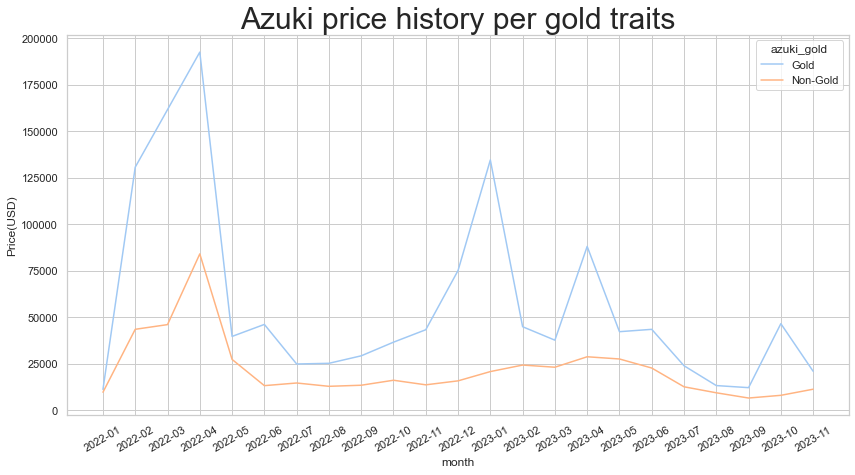

In [79]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(azuki_gold, x='month', y='price.netAmount.usd', hue='azuki_gold')
a.set(ylabel='Price(USD)')
plt.title('Azuki price history per gold traits', fontsize =30)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

<ipython-input-80-9276e68dc171>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '2022-01'),
 Text(1, 0, '2022-02'),
 Text(2, 0, '2022-03'),
 Text(3, 0, '2022-04'),
 Text(4, 0, '2022-05'),
 Text(5, 0, '2022-06'),
 Text(6, 0, '2022-07'),
 Text(7, 0, '2022-08'),
 Text(8, 0, '2022-09'),
 Text(9, 0, '2022-10'),
 Text(10, 0, '2022-11'),
 Text(11, 0, '2022-12'),
 Text(12, 0, '2023-01'),
 Text(13, 0, '2023-02'),
 Text(14, 0, '2023-03'),
 Text(15, 0, '2023-04'),
 Text(16, 0, '2023-05'),
 Text(17, 0, '2023-06'),
 Text(18, 0, '2023-07'),
 Text(19, 0, '2023-08'),
 Text(20, 0, '2023-09'),
 Text(21, 0, '2023-10'),
 Text(22, 0, '2023-11')]

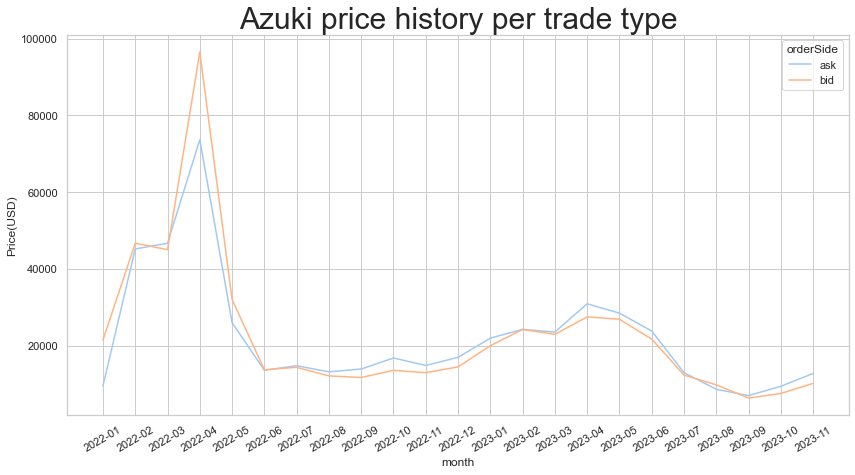

In [80]:
azuki_side = azuki[['orderSide','month','price.netAmount.usd']].groupby(by=['orderSide', 'month'], as_index= False).mean()
azuki_side['month'] = azuki_side['month'].astype(str)
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(azuki_side, x='month', y='price.netAmount.usd', hue='orderSide')
a.set(ylabel='Price(USD)')
plt.title('Azuki price history per trade type', fontsize =30)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

In [81]:
azuki_event['price.amount.decimal'].sort_values()

77850        0.00
77853        0.00
77852        0.00
77851        0.00
64983        0.00
           ...   
32449      275.00
46803      288.69
57080      329.69
31393      420.70
50586    27000.00
Name: price.amount.decimal, Length: 74077, dtype: float64

In [82]:
azuki_event[azuki_event['price.amount.decimal']==420.7]['token.tokenId']

31393    9605
Name: token.tokenId, dtype: int64

In [83]:
azuki_event['token.tokenId']

8700     1430
8701      845
8702     1431
8703     1362
8704     2442
         ... 
83872    4832
83873    3138
83874    9808
83875    1616
83876    7756
Name: token.tokenId, Length: 74077, dtype: int64

<ipython-input-88-d92ecc95f3d9>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '2022-01'),
 Text(1, 0, '2022-02'),
 Text(2, 0, '2022-03'),
 Text(3, 0, '2022-04'),
 Text(4, 0, '2022-05'),
 Text(5, 0, '2022-06'),
 Text(6, 0, '2022-07'),
 Text(7, 0, '2022-08'),
 Text(8, 0, '2022-09'),
 Text(9, 0, '2022-10'),
 Text(10, 0, '2022-11'),
 Text(11, 0, '2022-12'),
 Text(12, 0, '2023-01'),
 Text(13, 0, '2023-02'),
 Text(14, 0, '2023-03'),
 Text(15, 0, '2023-04'),
 Text(16, 0, '2023-05'),
 Text(17, 0, '2023-06'),
 Text(18, 0, '2023-07'),
 Text(19, 0, '2023-08'),
 Text(20, 0, '2023-09'),
 Text(21, 0, '2023-10'),
 Text(22, 0, '2023-11')]

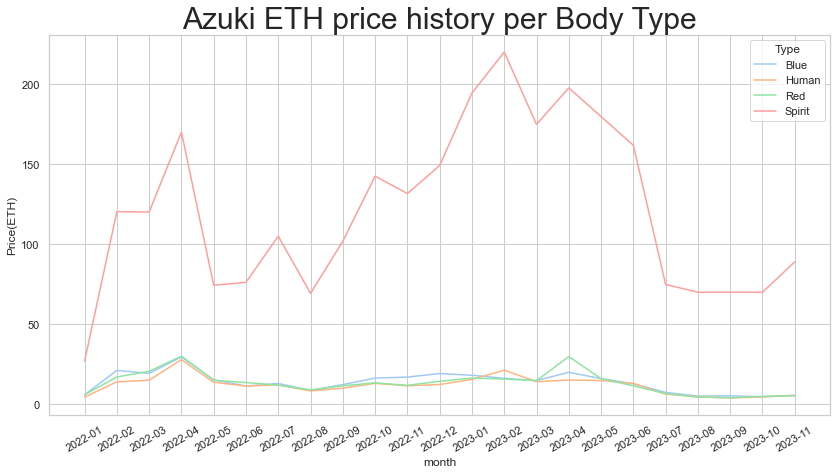

In [88]:
azuki_type = azuki[['Type','month','price.amount.decimal']].groupby(by=['Type', 'month'], as_index= False).mean()
azuki_type['month'] = azuki_type['month'].astype(str)
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(azuki_type, x='month', y='price.amount.decimal', hue='Type')
a.set(ylabel='Price(ETH)')
plt.title('Azuki ETH price history per Body Type', fontsize =30)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

<ipython-input-87-b77fb794318f>:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '2022-01'),
 Text(1, 0, '2022-02'),
 Text(2, 0, '2022-03'),
 Text(3, 0, '2022-04'),
 Text(4, 0, '2022-05'),
 Text(5, 0, '2022-06'),
 Text(6, 0, '2022-07'),
 Text(7, 0, '2022-08'),
 Text(8, 0, '2022-09'),
 Text(9, 0, '2022-10'),
 Text(10, 0, '2022-11'),
 Text(11, 0, '2022-12'),
 Text(12, 0, '2023-01'),
 Text(13, 0, '2023-02'),
 Text(14, 0, '2023-03'),
 Text(15, 0, '2023-04'),
 Text(16, 0, '2023-05'),
 Text(17, 0, '2023-06'),
 Text(18, 0, '2023-07'),
 Text(19, 0, '2023-08'),
 Text(20, 0, '2023-09'),
 Text(21, 0, '2023-10'),
 Text(22, 0, '2023-11')]

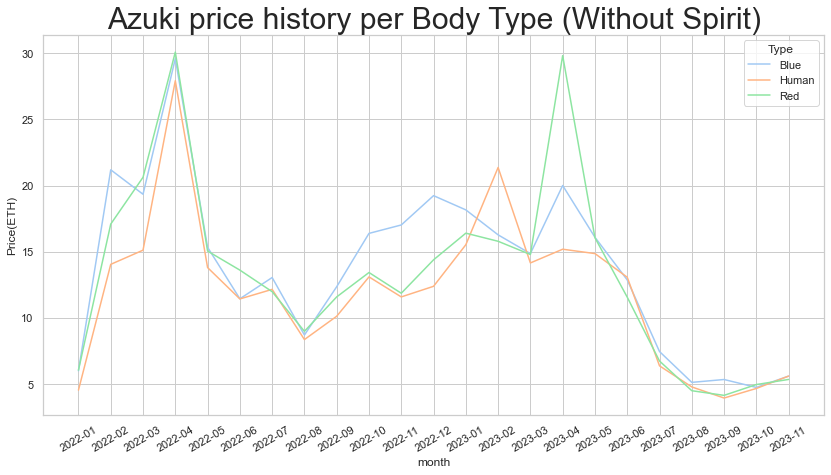

In [87]:
#Set aside the 'Spirit' type
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(azuki_type[azuki_type['Type']!='Spirit'], x='month', y='price.amount.decimal', hue='Type')
a.set(ylabel='Price(ETH)')
plt.title('Azuki price history per Body Type (Without Spirit)', fontsize =30)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=azuki['month'] ))
fig.update_layout(title_text = "Distribution of ETH profit", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show()

,Type,month
0,Human,2022-01
1,Human,2022-01
2,Human,2022-01
3,Human,2022-01
4,Human,2022-01
...,...,...
74072,Red,2023-11
74073,Red,2023-11
74074,Human,2023-10
74075,Human,2023-10


In [105]:
azuki.columns

Index(['orderSource', 'orderSide', 'orderKind', 'from', 'to', 'amount',
       'fillSource', 'block', 'txHash', 'timestamp', 'washTradingScore',
       'createdAt', 'updatedAt', 'token.contract', 'token.tokenId',
       'price.currency.symbol', 'price.amount.decimal', 'price.amount.usd',
       'price.amount.native', 'royaltyFeeBps', 'price.netAmount.decimal',
       'price.netAmount.usd', 'price.netAmount.native', 'marketplaceFeeBps',
       'time_diff', 'Arbitrage profit', 'nft.identifier', 'Background',
       'Clothing', 'Ear', 'Eyes', 'Face', 'Hair', 'Headgear', 'Mouth', 'Neck',
       'Offhand', 'Special', 'Type', 'azuki_gold', 'month'],
      dtype='object')

In [109]:
trade_count = azuki[['Type','month','amount']].groupby(by=['Type','month'], as_index=False)['amount'].count()

In [138]:
azuki['month'] = azuki['month'].astype(str)
azuki['month'].sort_values().unique()

array(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11'],
      dtype=object)

<ipython-input-133-f0a08d3bbec4>:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '2022-01'),
 Text(1, 0, '2022-02'),
 Text(2, 0, '2022-03'),
 Text(3, 0, '2022-04'),
 Text(4, 0, '2022-05'),
 Text(5, 0, '2022-06'),
 Text(6, 0, '2022-07'),
 Text(7, 0, '2022-08'),
 Text(8, 0, '2022-09'),
 Text(9, 0, '2022-10'),
 Text(10, 0, '2022-11'),
 Text(11, 0, '2022-12'),
 Text(12, 0, '2023-01'),
 Text(13, 0, '2023-02'),
 Text(14, 0, '2023-03'),
 Text(15, 0, '2023-04'),
 Text(16, 0, '2023-05'),
 Text(17, 0, '2023-06'),
 Text(18, 0, '2023-07'),
 Text(19, 0, '2023-08'),
 Text(20, 0, '2023-09'),
 Text(21, 0, '2023-10'),
 Text(22, 0, '2023-11')]

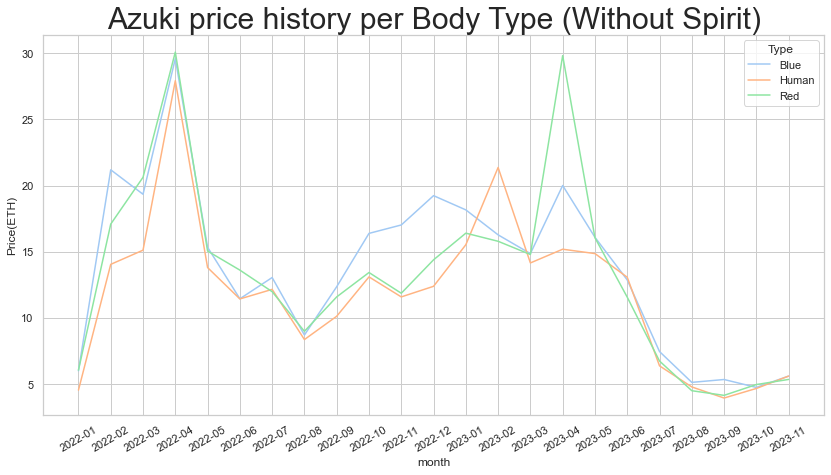

In [133]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(azuki_type[azuki_type['Type']!='Spirit'], x='month', y='price.amount.decimal', hue='Type')
a.set(ylabel='Price(ETH)')
plt.title('Azuki price history per Body Type (Without Spirit)', fontsize =30)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

<ipython-input-142-5102c0b89385>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '2022-01'),
 Text(1, 0, '2022-02'),
 Text(2, 0, '2022-03'),
 Text(3, 0, '2022-04'),
 Text(4, 0, '2022-05'),
 Text(5, 0, '2022-06'),
 Text(6, 0, '2022-07'),
 Text(7, 0, '2022-08'),
 Text(8, 0, '2022-09'),
 Text(9, 0, '2022-10'),
 Text(10, 0, '2022-11'),
 Text(11, 0, '2022-12'),
 Text(12, 0, '2023-01'),
 Text(13, 0, '2023-02'),
 Text(14, 0, '2023-03'),
 Text(15, 0, '2023-04'),
 Text(16, 0, '2023-05'),
 Text(17, 0, '2023-06'),
 Text(18, 0, '2023-07'),
 Text(19, 0, '2023-08'),
 Text(20, 0, '2023-09'),
 Text(21, 0, '2023-10'),
 Text(22, 0, '2023-11')]

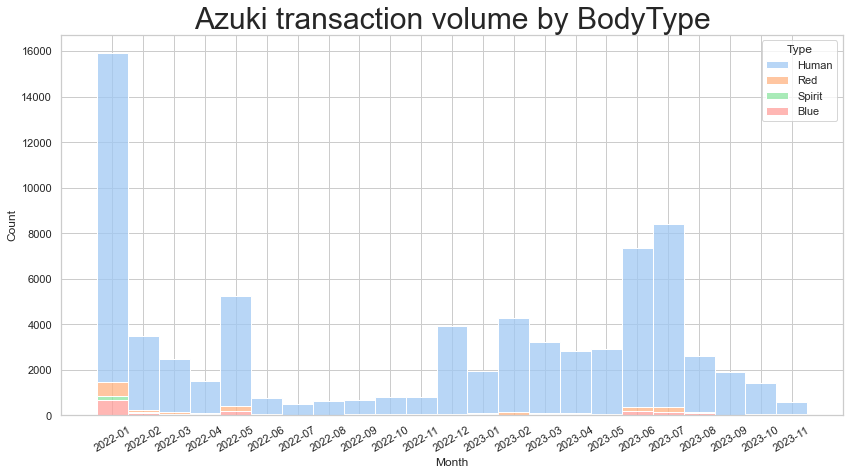

In [142]:
azuki['month'] = azuki['month'].astype(str)
azuki['month'] = pd.Categorical(azuki['month'], azuki['month'].sort_values().unique())

sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
a = sns.histplot(data = azuki, x='month',hue='Type', multiple="stack", binwidth= 1)
a.set(xlabel = 'Month')
plt.title('Azuki transaction volume by BodyType', fontsize =30)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)
